<a href="https://colab.research.google.com/github/jmgang/SpoTwoFy-project-notebooks/blob/main/notebooks/SpoTWOfy_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ML tools
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# import feature_engine
# from feature_engine.outliers import Winsorizer

import random

In [ ]:
# Mount GDrive folders
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set home directory
import os
home_dir = "drive/MyDrive/Eskwelabs/Sprint 3/data" # insert your home directory here
os.chdir(home_dir)

# Get Dataframe

In [ ]:
# df = pd.read_csv('hale_discog_audio_features.csv')
df = pd.read_csv('hale_songs.csv')
df2 = pd.read_csv('hale_total_streams2.csv')

In [ ]:
df2

,track_name,album_name,total_streams
0,Daylight,Alon,326750
1,We Are,Alon,204781
2,Fire,Alon,157619
3,Desire,Alon,981389
4,Dreamcatcher,Alon,275815
...,...,...,...
62,Here Tonight,Hale,2586946
63,Life Support,Hale,405745
64,Underneath the Waves,Hale,1362216
65,Runaway,Hale,791803


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_name     67 non-null     object
 1   album_name     67 non-null     object
 2   total_streams  67 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ KB


In [ ]:
df

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_name,album_id,album_name,popularity,release_date
0,4S1DcySs2qHEggSlceBmvl,0.580,0.664,9,-6.541,1,0.0316,0.42400,0.323000,0.1280,0.195,132.259,236600,Take No,3rYydzqOp83YUYh4EXjrbk,Hale,32,2005
1,40b9yd2XrcYXuJkoW9bHIr,0.312,0.514,7,-7.213,1,0.0332,0.09910,0.000169,0.1120,0.233,140.853,296547,Broken Sonnet,3rYydzqOp83YUYh4EXjrbk,Hale,53,2005
2,5KFFqtixyLrREHz3iiU9jw,0.588,0.490,4,-6.401,1,0.0344,0.30400,0.025000,0.0720,0.331,75.155,286960,Blue Sky,3rYydzqOp83YUYh4EXjrbk,Hale,68,2005
3,08hFNg8Oz3lvaAms7qrIif,0.556,0.563,4,-6.591,1,0.0320,0.51100,0.000000,0.1190,0.238,134.259,291320,The Day You Said Goodnight,3rYydzqOp83YUYh4EXjrbk,Hale,73,2005
4,4fnBf4JSGxnVw3cPED47Xt,0.644,0.626,2,-5.633,1,0.0372,0.22400,0.000237,0.2190,0.155,118.440,286947,Wishing,3rYydzqOp83YUYh4EXjrbk,Hale,30,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1tgAF6zLIOBksB0dmpVM9O,0.400,0.269,6,-11.763,1,0.0290,0.83800,0.000053,0.0859,0.282,146.699,242534,Plasticine,7ipnlz8tLUzVBJeeZeiz2v,Time & Space,20,2015-03-23
79,6RXbOOGqxPMr99pEbaJjOC,0.586,0.601,7,-9.111,1,0.0493,0.38900,0.002840,0.0881,0.519,126.997,228526,Home,7ipnlz8tLUzVBJeeZeiz2v,Time & Space,22,2015-03-23
80,6CHpr3pY2MbJ5y1076UDnI,0.424,0.221,4,-9.279,1,0.0351,0.88200,0.000000,0.1340,0.299,125.964,328533,The Day You Said Goodnight - Acoustic Version,5www5PCOdkBpuNCanxeo6L,The Day You Said Goodnight (Acoustic Version),55,2006-02-26
81,13XyijaeNt2iThYc36UJXC,0.616,0.853,11,-8.607,1,0.0438,0.00009,0.698000,0.0212,0.956,130.011,488829,The Day You Said Goodnight (Leon Chaplain Mass...,12R5dPogCQrWOamitULYVA,The Day You Said Goodnight (Leon Chaplain Mass...,5,2006-07-29


In [ ]:
# Convert 'total_streams' column to numeric
df2['total_streams'] = pd.to_numeric(df2['total_streams'])

# Plots

In [ ]:
# Calculate the percentage of total streams for each track
df2['stream_percentage'] = (df2['total_streams'] / df2['total_streams'].sum()) * 100

# Create a tree plot (treemap)
fig = px.treemap(df2,
                 path=['album_name', 'track_name'],
                 values='stream_percentage',
                 title='Track Contribution to Total Streams')

fig.update_traces(textinfo="label+value+percent parent")
fig.show()

In [ ]:
df2

,track_name,album_name,total_streams,total_streams_total,stream_percentage
0,Daylight,Alon,326750,13266698,0.067570
1,We Are,Alon,204781,13266698,0.042347
2,Fire,Alon,157619,13266698,0.032595
3,Desire,Alon,981389,13266698,0.202945
4,Dreamcatcher,Alon,275815,13266698,0.057037
...,...,...,...,...,...
62,Here Tonight,Hale,2586946,7512146,0.534963
63,Life Support,Hale,405745,7512146,0.083905
64,Underneath the Waves,Hale,1362216,7512146,0.281697
65,Runaway,Hale,791803,7512146,0.163739


In [ ]:
# Assuming 'total_streams' is numeric (if not, convert it to numeric)
df2['total_streams'] = pd.to_numeric(df2['total_streams'])

# Calculate the percentage of total streams for each track
df2['stream_percentage'] = (df2['total_streams'] / df2['total_streams'].sum()) * 100

# Create a tree plot (treemap) for individual tracks
fig = px.treemap(df2,
                 path=['track_name'],
                 values='stream_percentage',
                 title='Track Contribution to Total Streams')

# fig.update_traces(values=df2['total_streams'].round(2).astype(str) + '%', textinfo='label+value')
fig.update_traces(textinfo="label+percent parent")

# Set the width and height to create a square aspect ratio
fig.update_layout(
    width=800,  # Adjust the width as needed
    height=800,  # Adjust the height as needed
    font=dict(
        size=16  # Adjust the font size as needed
    )
)

fig.show()

# Histogram of entire discography

In [ ]:
columns_to_plot = [
    'popularity',
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo'
]

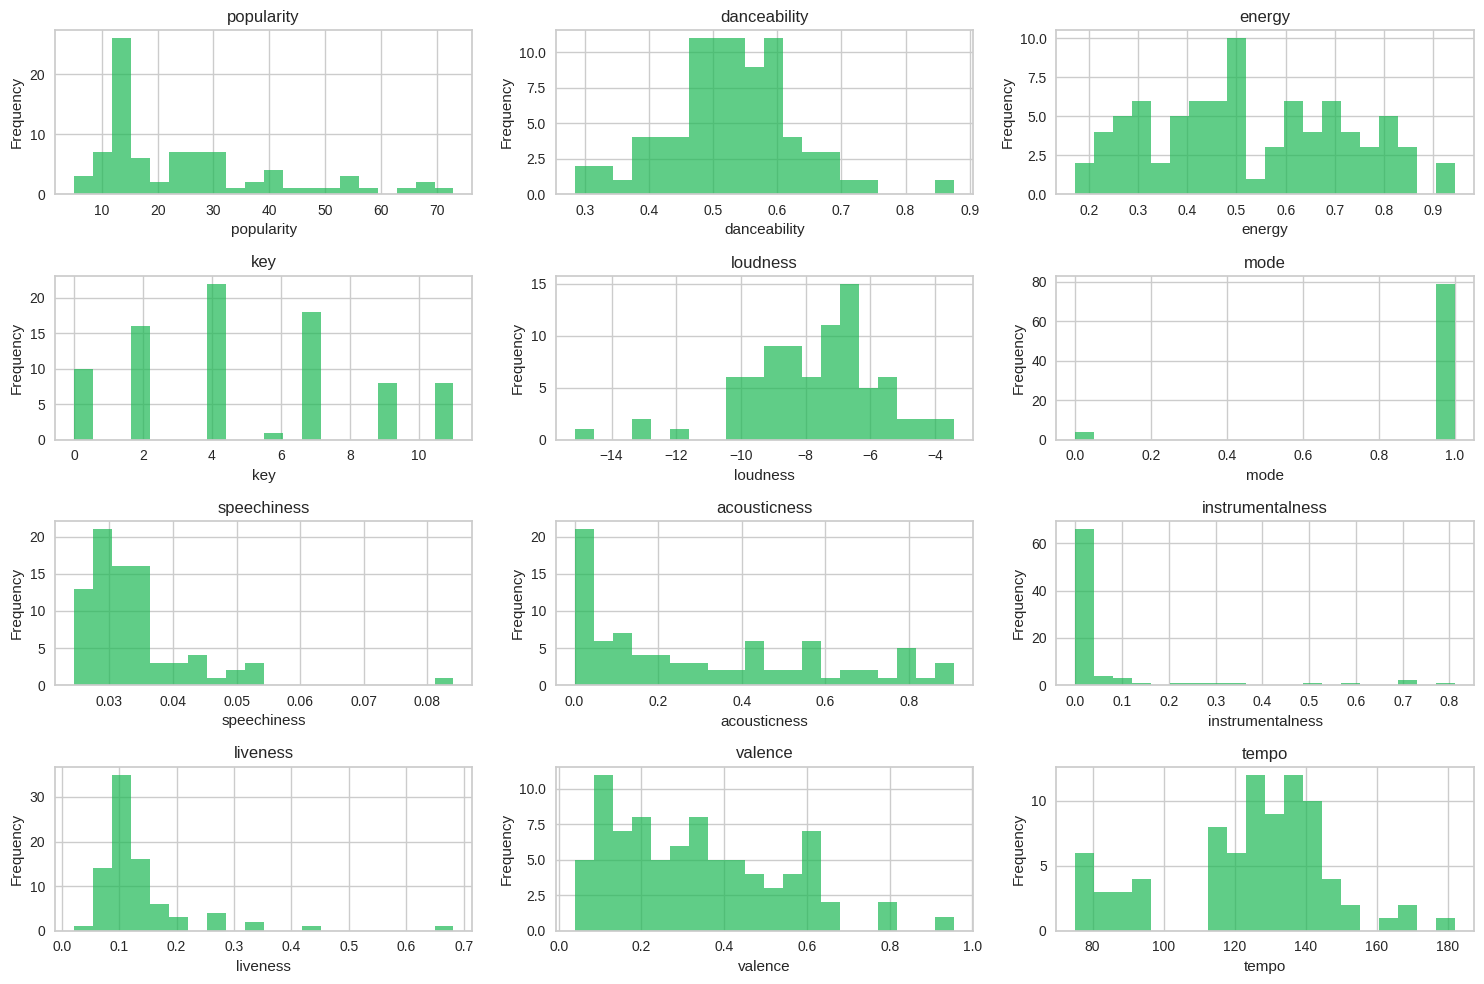

In [ ]:
# Create a 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

# Flatten the 2D array of axes for easier iteration
axes = axes.ravel()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Get the current axis
    ax.hist(df[column], bins=20, color='#1DB954', alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Histogram for individual albums

In [ ]:
# Group by 'album_id'
grouped = df.groupby('album_id')
grouped

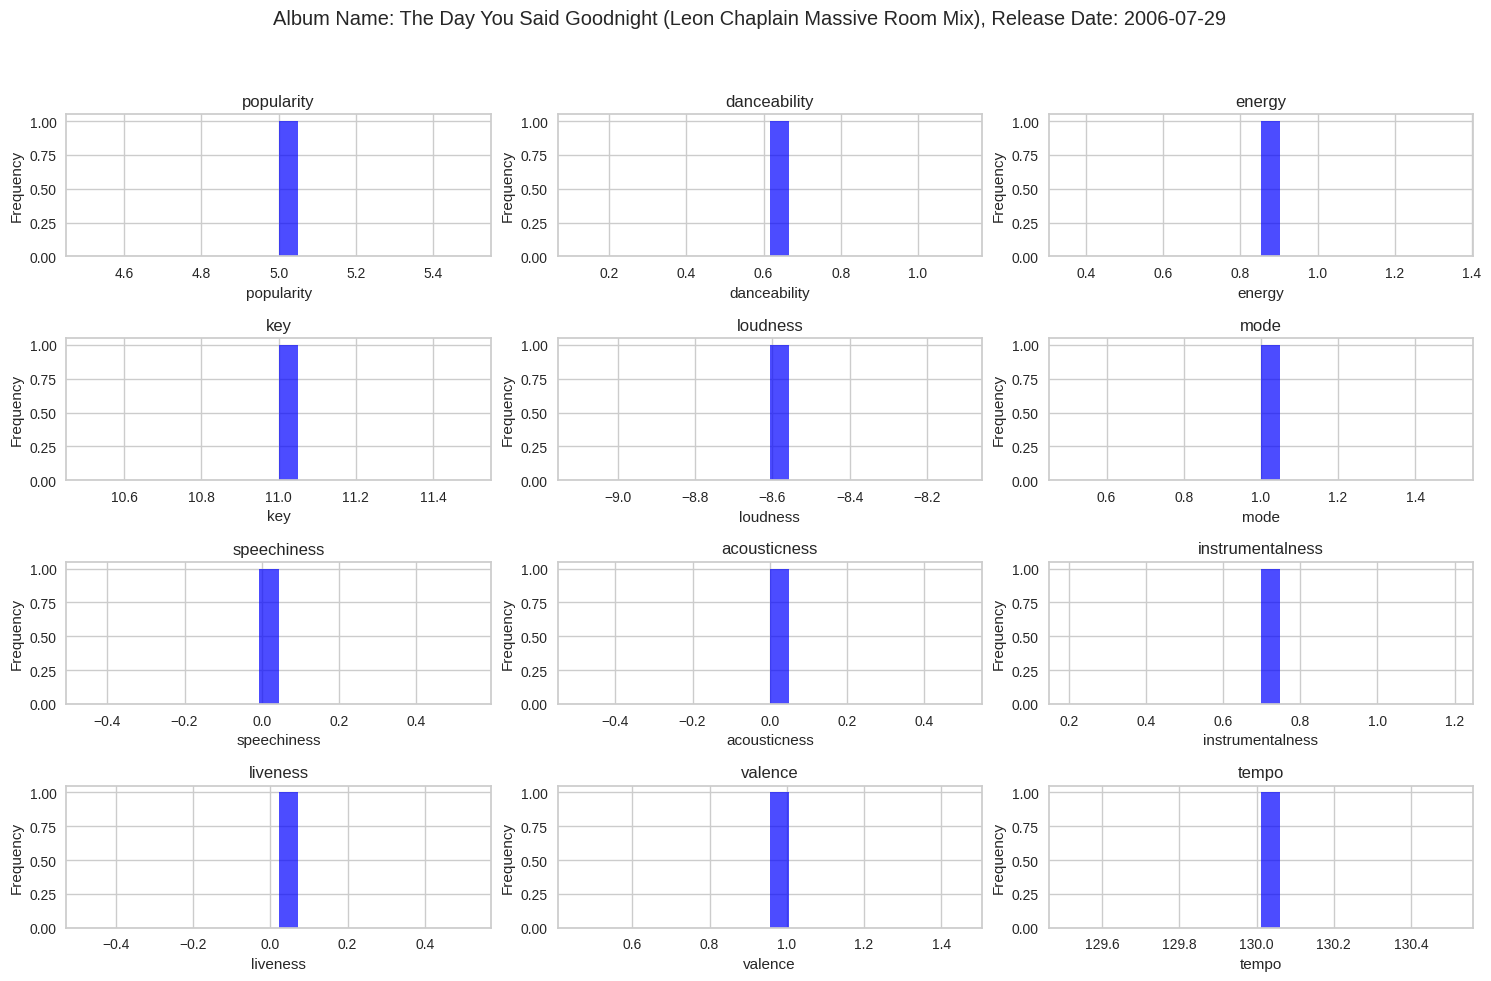

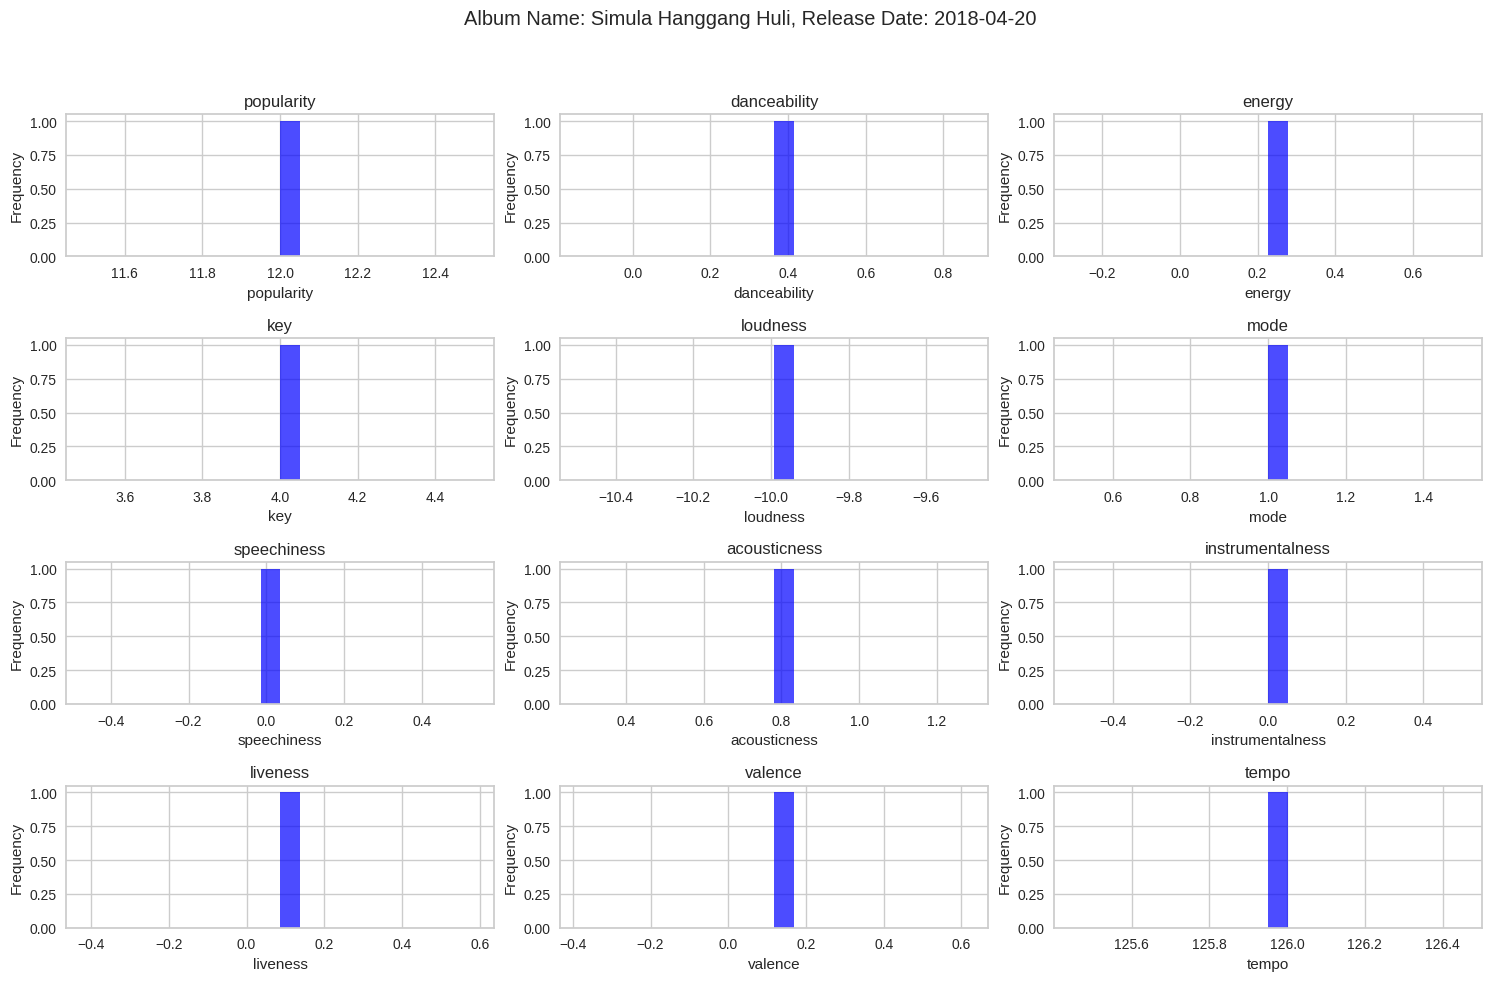

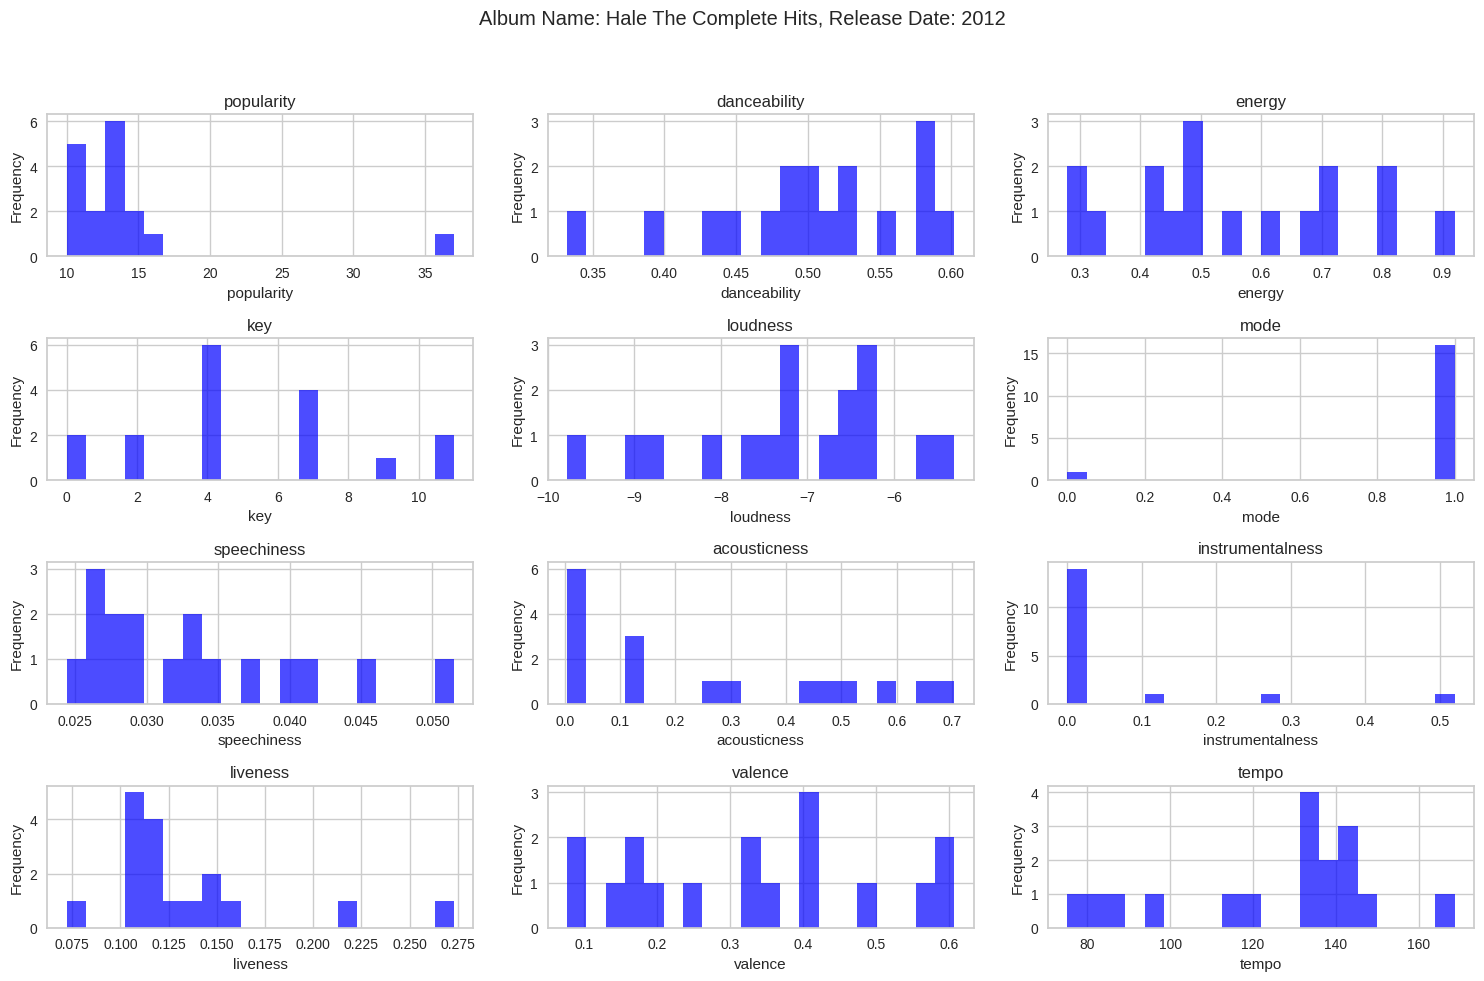

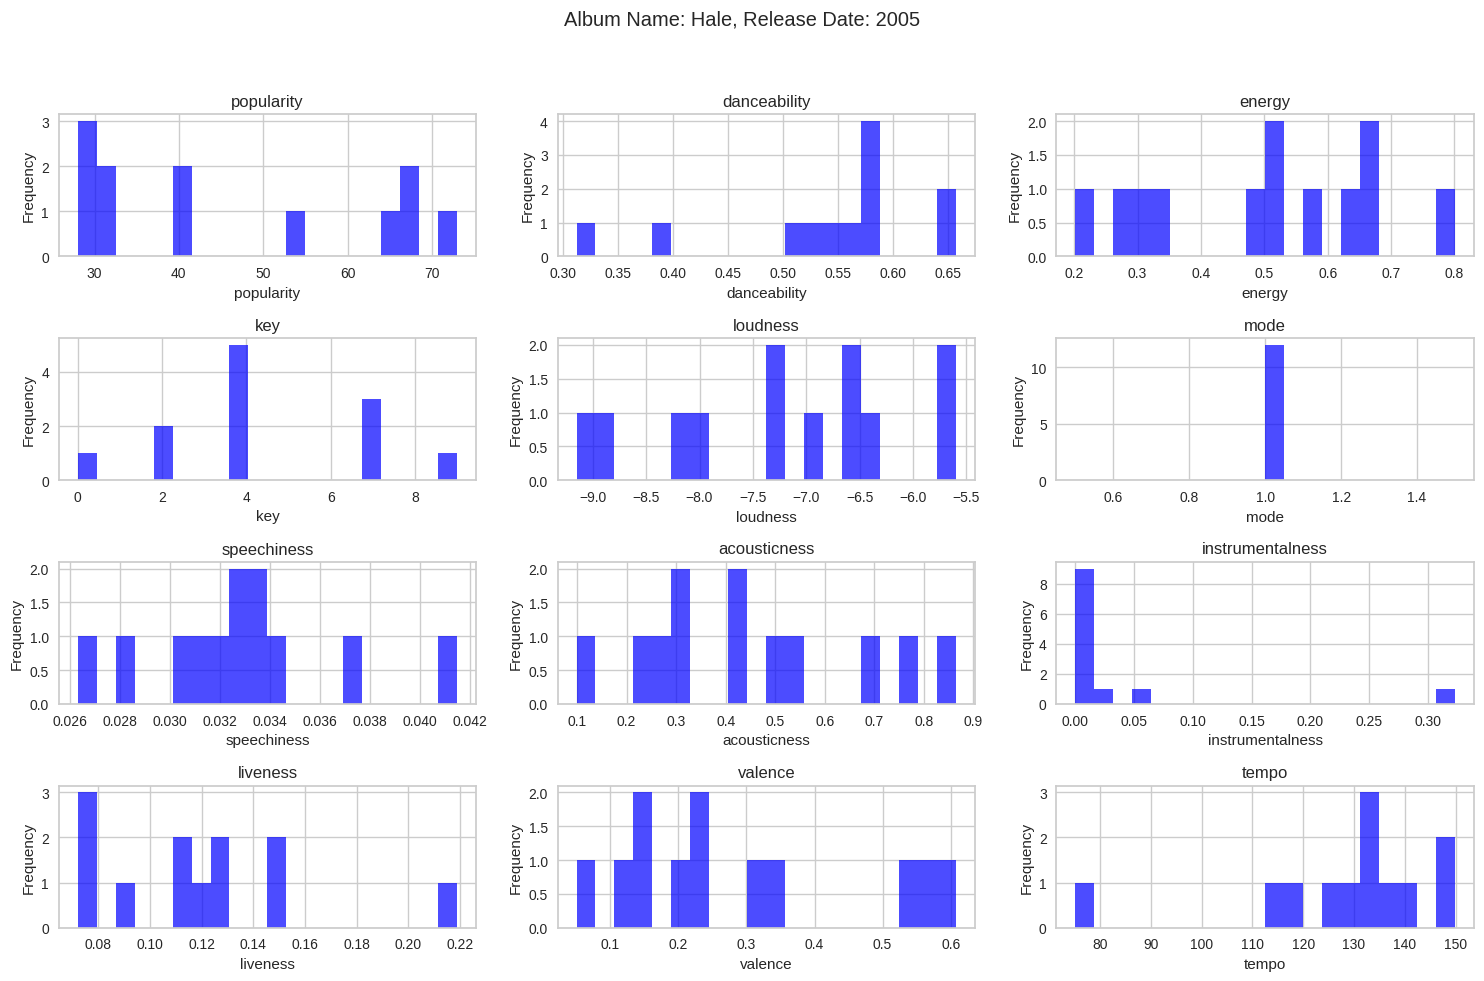

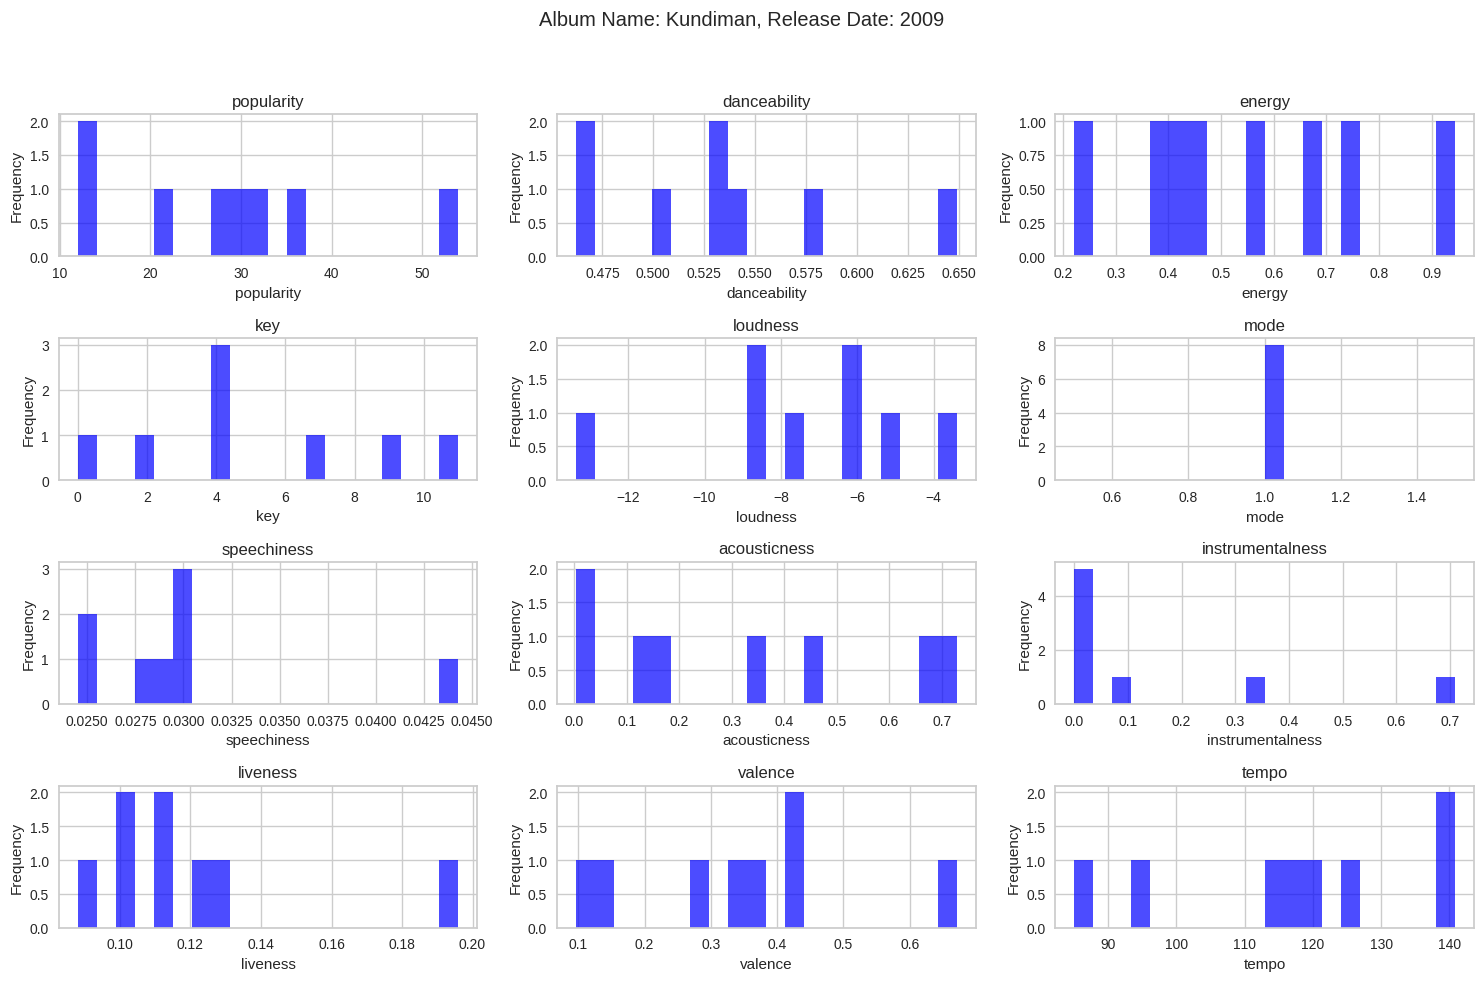

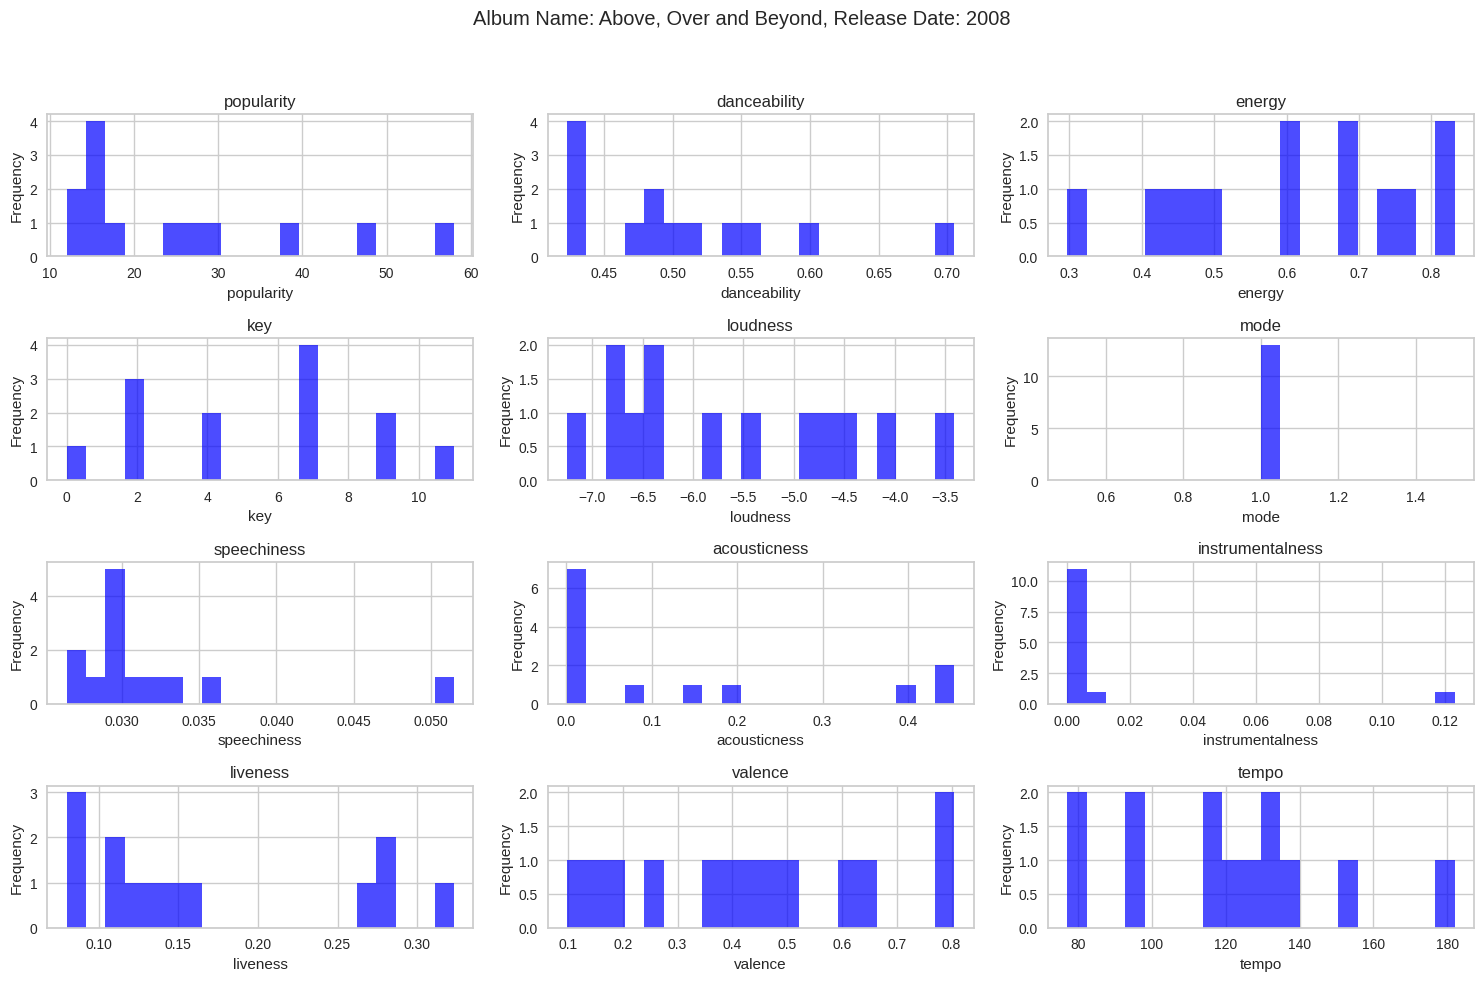

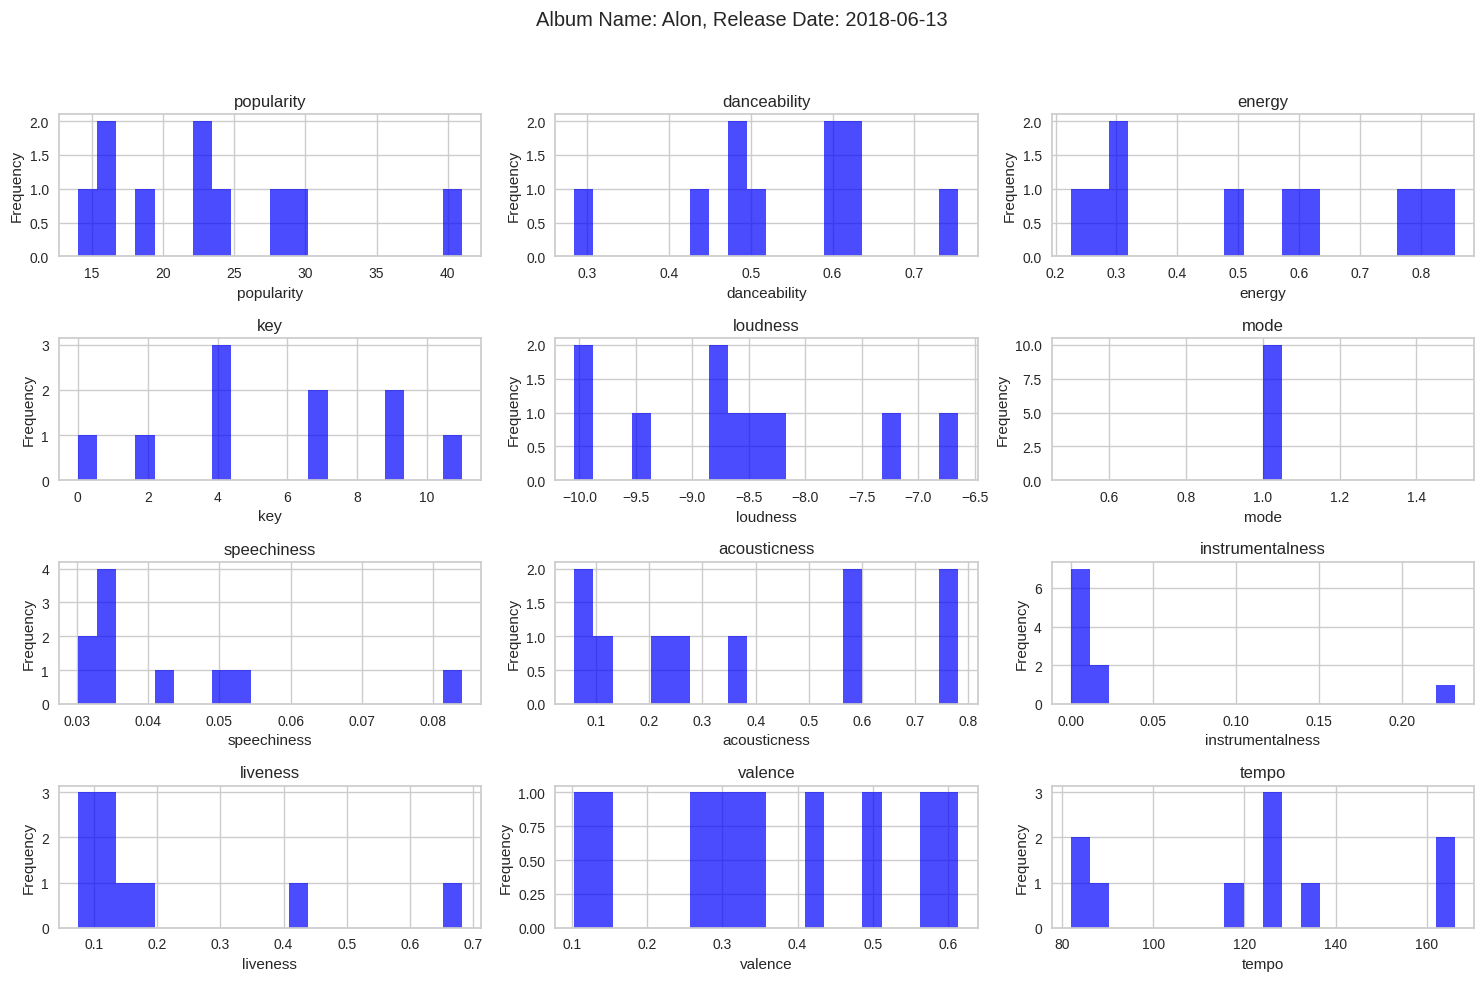

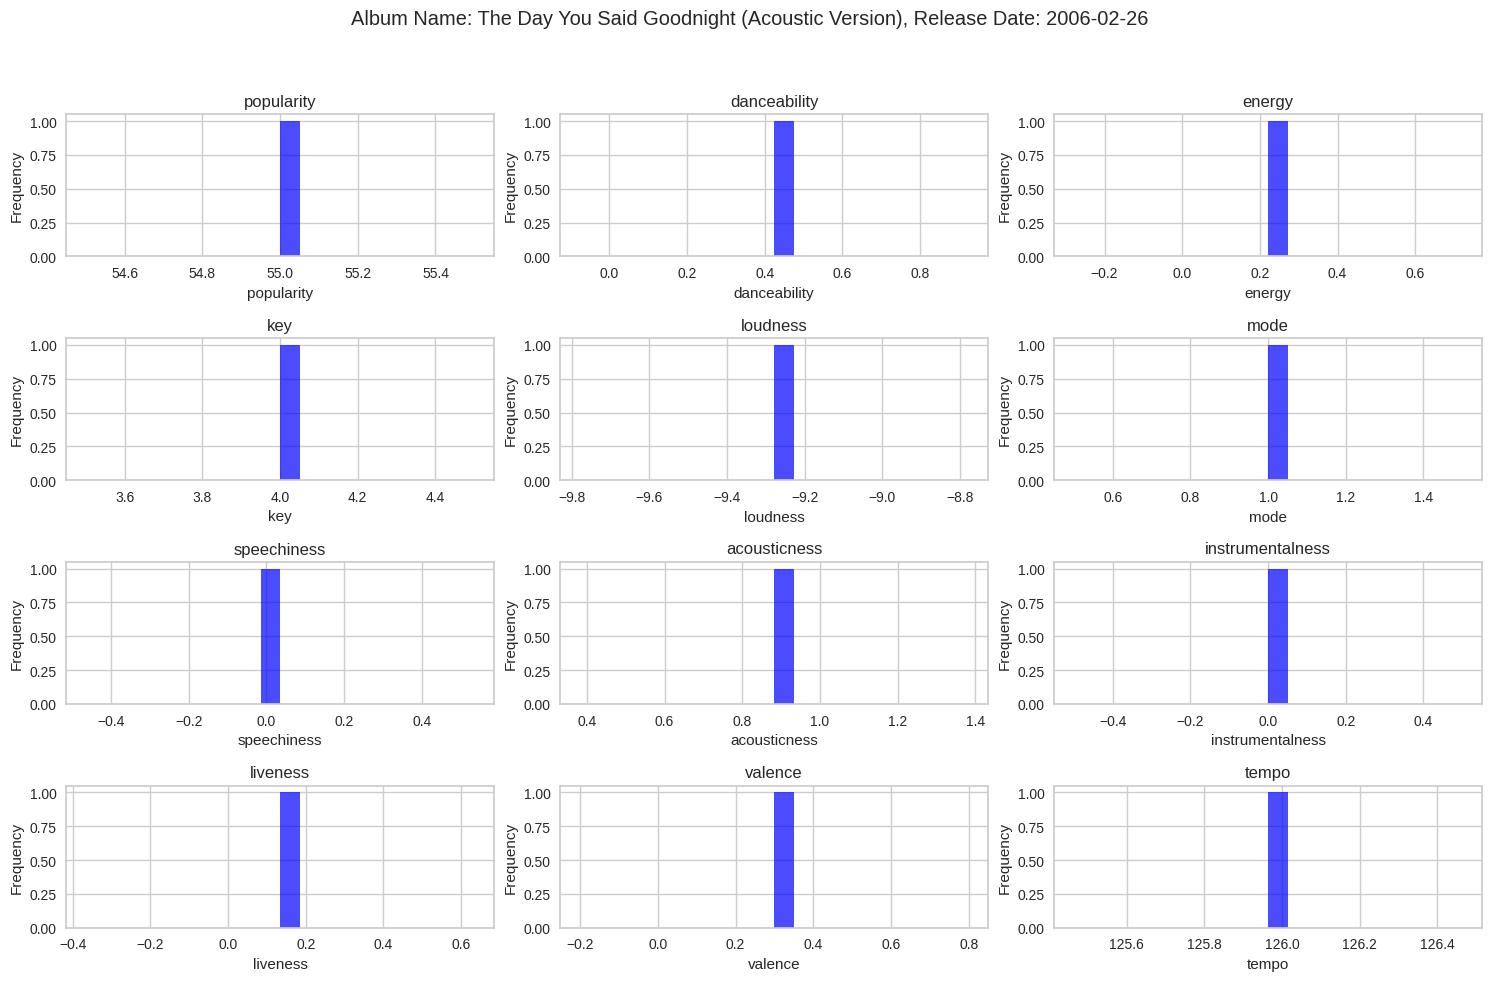

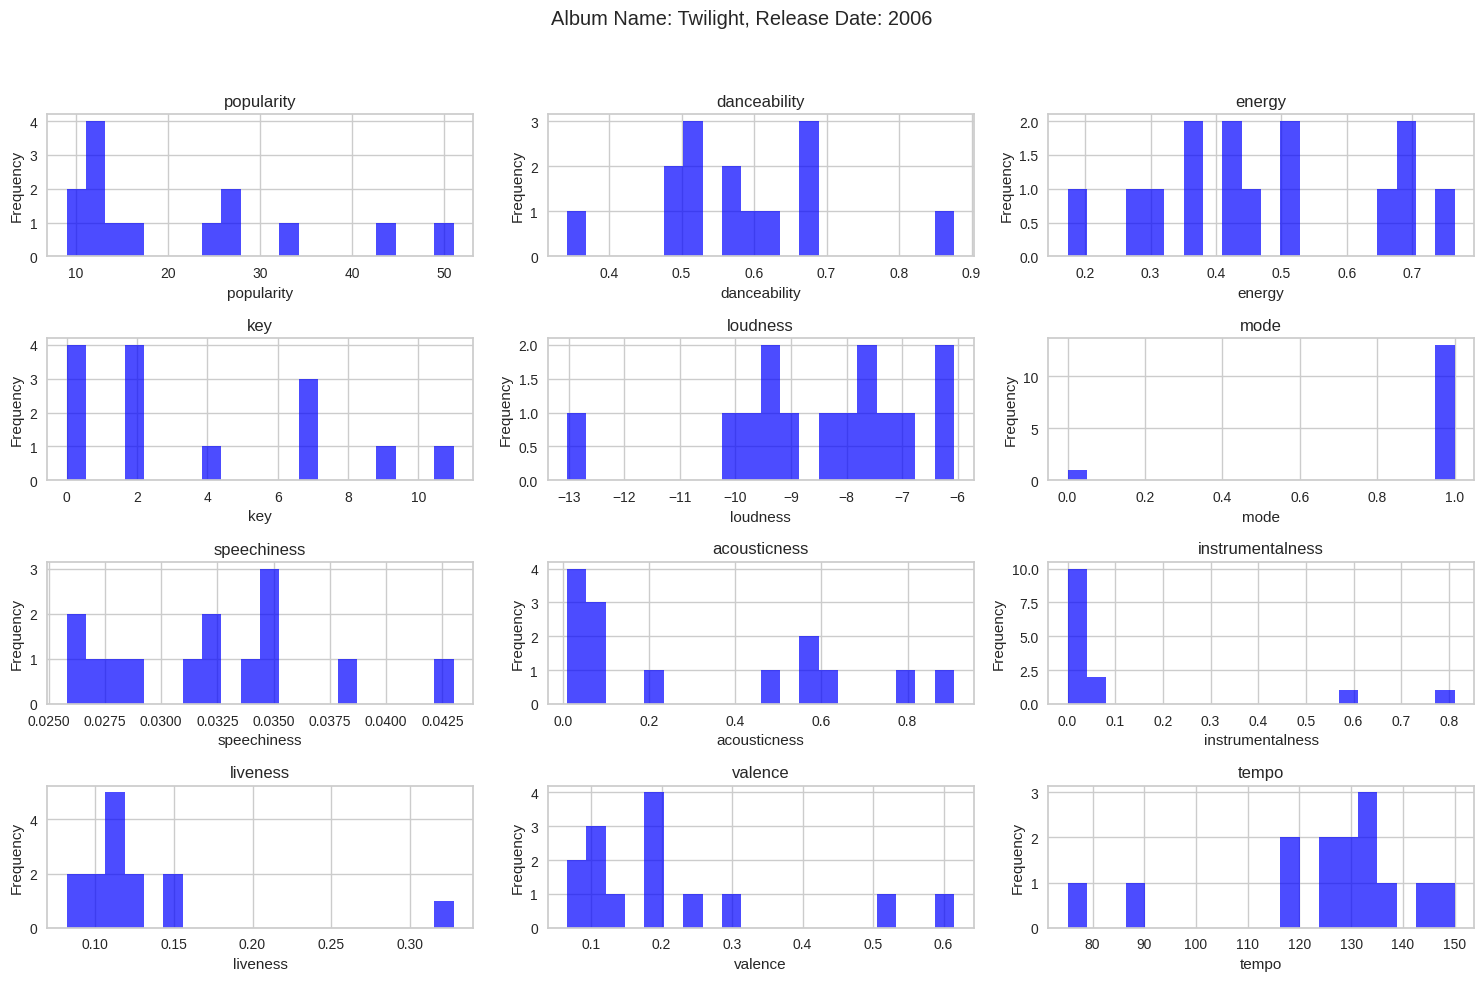

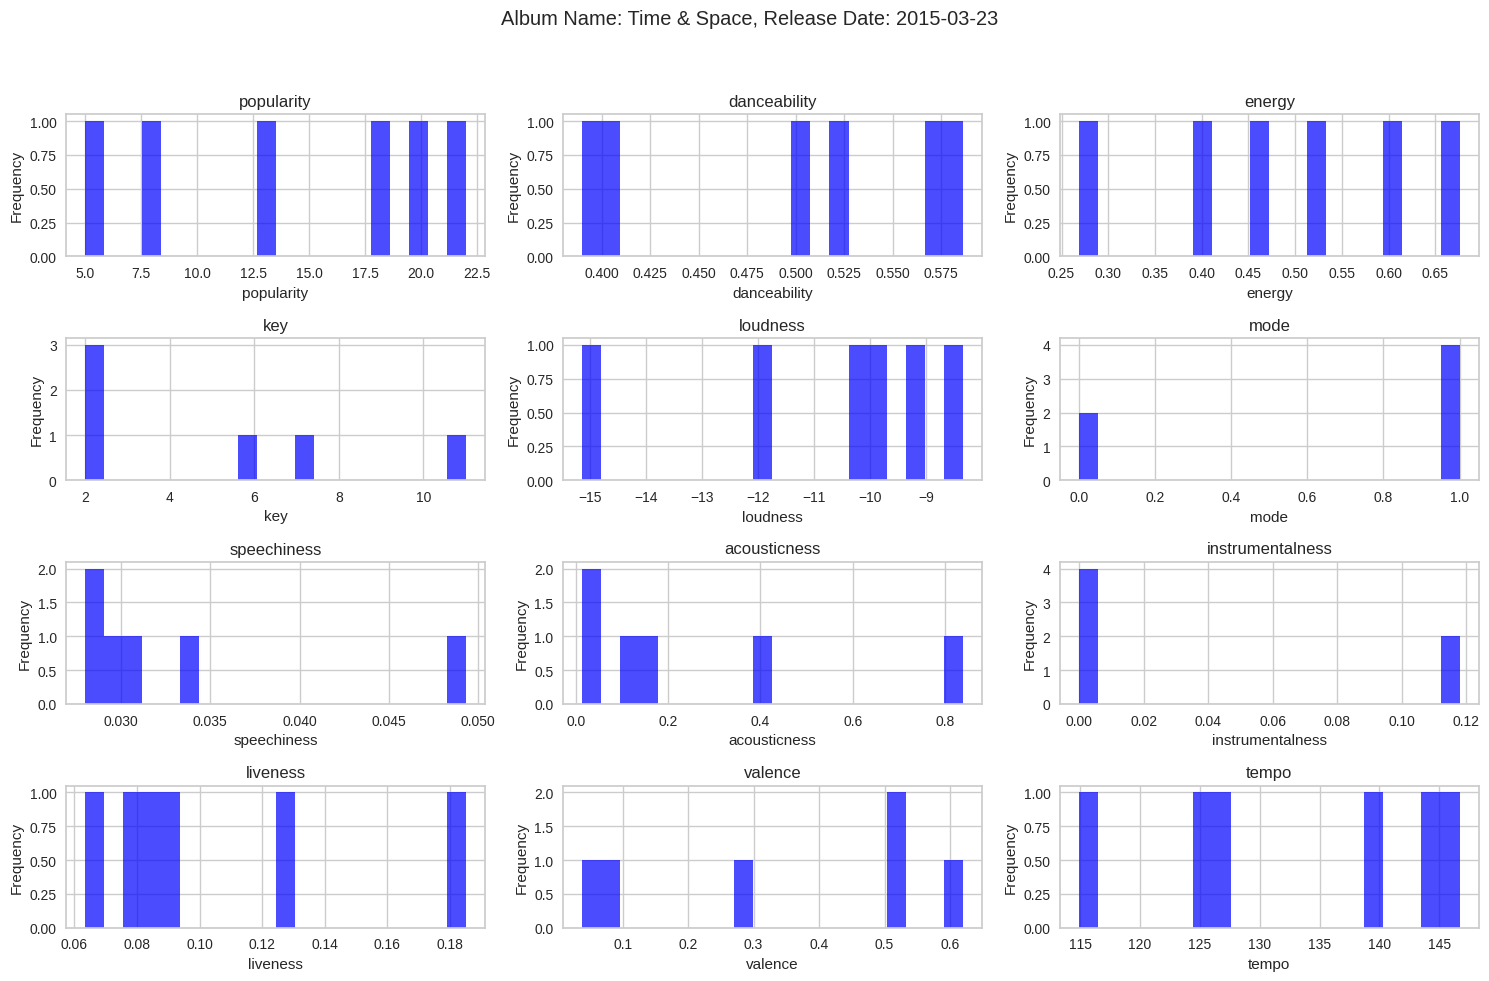

In [ ]:
# Iterate through the groups and create separate subplots for each 'album_id'
for album_id, group_data in grouped:
    fig, axes = plt.subplots(4, 3, figsize=(15, 10))
    axes = axes.ravel()

    for i, column in enumerate(columns_to_plot):
        ax = axes[i]
        ax.hist(group_data[column], bins=20, color='blue', alpha=0.7)
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

    # Get the release_date for the current 'album_id'
    release_date = group_data['release_date'].iloc[0]
    album_name = group_data['album_name'].iloc[0]

    # Set the album_id and release_date as the title for the entire subplot
    plt.suptitle(f'Album Name: {album_name}, Release Date: {release_date}')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Add space for the suptitle
    plt.show()

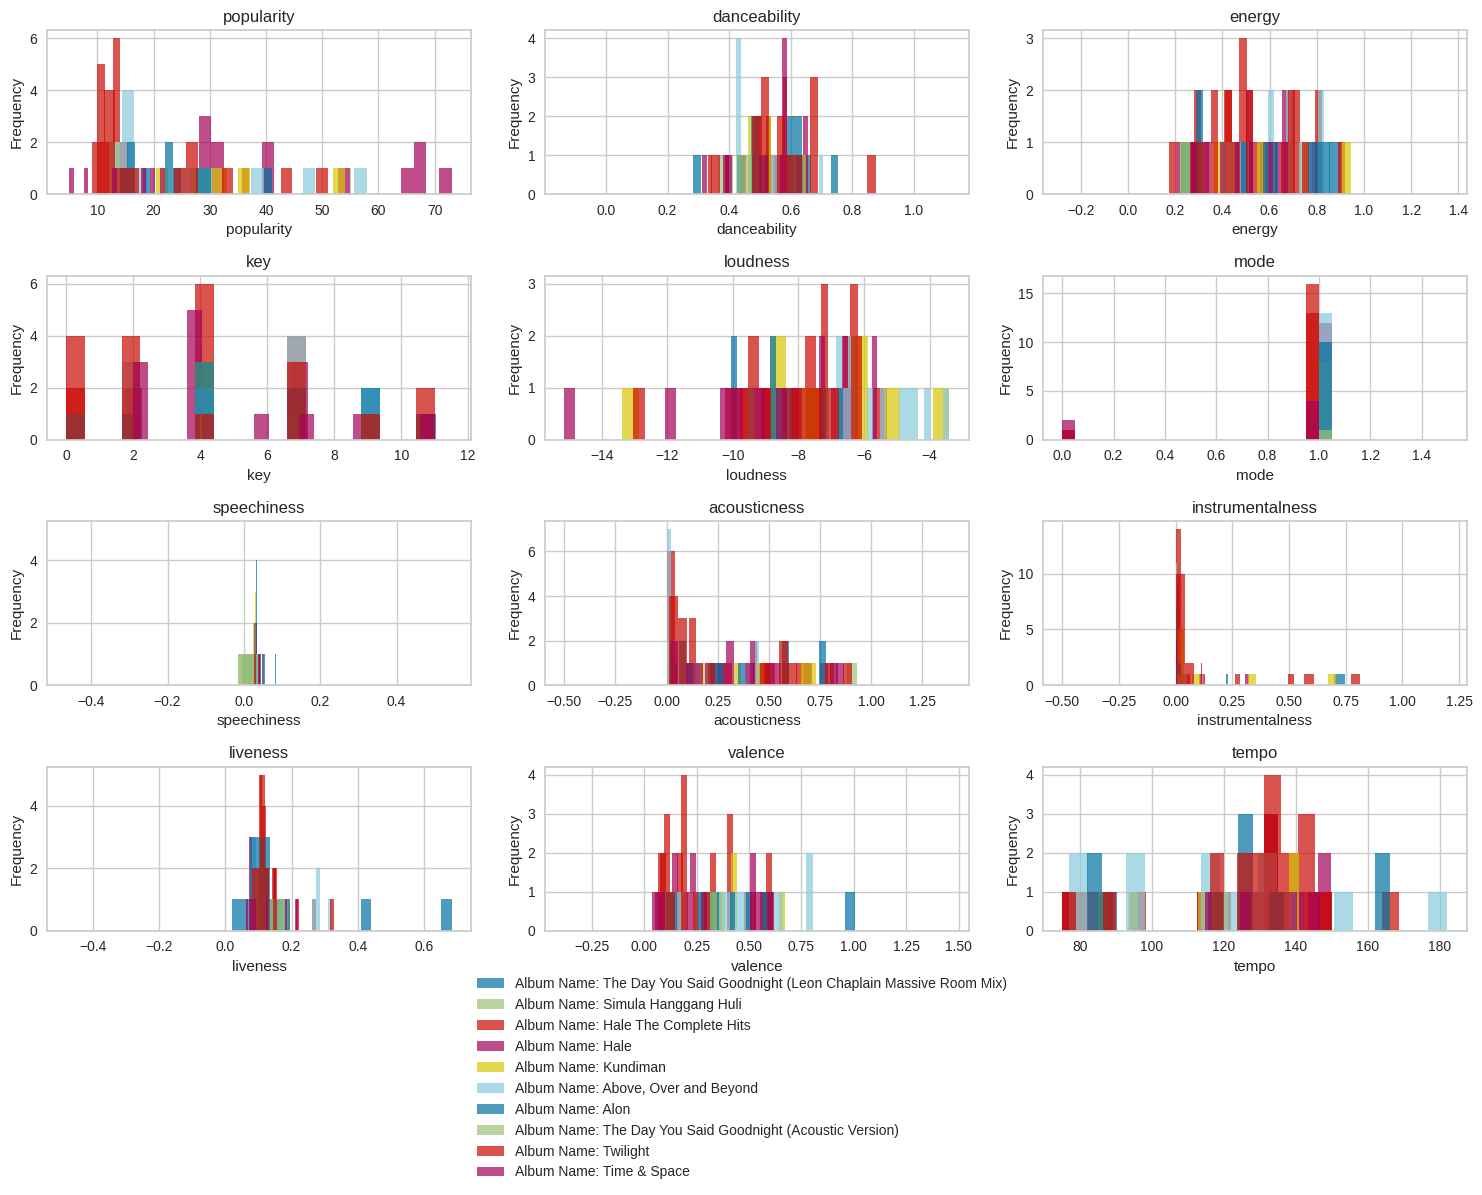

In [ ]:
# Create a single 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.ravel()

# Create a dictionary to store album names for each album_id
album_names = {}

# Iterate through the columns to plot
for i, column in enumerate(columns_to_plot):
    ax = axes[i]

    # Iterate through different album_id and overlay histograms
    for album_id, group_data in grouped:
        if album_id not in album_names:
            album_names[album_id] = group_data['album_name'].iloc[0]
        ax.hist(group_data[column], bins=20, alpha=0.7, label=f'Album Name: {album_names[album_id]}')

    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Add a legend at the bottom of the plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2))

# Adjust layout
plt.tight_layout()
plt.show()